In [1]:
from build_user_subreddit_history import read_json_list
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from networkx.algorithms import bipartite
import networkx as nx
import random
from community import community_louvain
import matplotlib.cm as cm
from datetime import datetime
from datetime import date
import datetime as dt
import seaborn as sns
import pandas as pd
from scipy import stats

spacy.prefer_gpu()

False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## get the subreddits from WFH

In [3]:
# select variables that I want related to the posts: content, time, author, title, subreddit
def get_contents(sub):
    
    result_dic = {}
    
    filename = "new_data/{1}/{0}/{1}_jsonlists.gz".format(sub, 'posts')
    
    i = 0
    
    for dic in read_json_list(filename):
            result = {}
            if 'selftext' in dic:
                title = dic['title']
                text = dic['selftext']
                subreddit = dic['subreddit']
                created_time = dic['created_utc']   
                if text != '[removed]':
                    result['text'] = title+' '+text 
                    result['time'] = datetime.utcfromtimestamp(created_time).strftime('%Y-%m-%d %H:%M:%S')
                    result['date'] = result['time'][:10]
                    result_dic[i] = result
                    i += 1
    
    return result_dic

In [4]:
workfromhome = get_contents('WorkFromHome')

In [5]:
workfromhome

{0: {'text': 'Making it easy for everyone ',
  'time': '2022-04-11 18:09:47',
  'date': '2022-04-11'},
 1: {'text': 'Resume example? Trying to apply for at home work &amp; need to overhaul my resume. Anyone have any examples that can help me out?',
  'time': '2022-04-11 17:03:44',
  'date': '2022-04-11'},
 2: {'text': 'Need Legit Work from Home Sites Anyone know of any legitimate work from home sites that I can browse?',
  'time': '2022-04-11 15:54:56',
  'date': '2022-04-11'},
 3: {'text': 'Work from home will improve your mental health ',
  'time': '2022-04-11 11:48:55',
  'date': '2022-04-11'},
 4: {'text': 'Has anyone faced this situation in team call ? I was in slack call with my team members and heard moaning from one team member. How clueless one can be to not use the mute option ',
  'time': '2022-04-11 07:32:03',
  'date': '2022-04-11'},
 5: {'text': "Suggestions for a 2nd WFH job.. I have the opportunity to take a 3rd shift job that pretty much just requires me to be there if

## sentiment analysis

In [6]:
def sentiment_scores(sentence):
    
    result = 0
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
#     print("Overall sentiment dictionary is : ", sentiment_dict)
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
#     print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.35 :
        result = "Positive"
#         print("Positive")
 
    elif sentiment_dict['compound'] <= - 0.05 :
        result = "Negative"
#         print("Negative")
 
    else :
        result = "Neutral"
#         print("Neutral")
    return result

In [7]:
for i in range(200,500):
    sample = workfromhome[i]['text']
    print(i)
    print(sample)
    print(sentiment_scores(sample))

200
VESA mount I know this is going to be controversial, but I’m not here for arguments on wether this should be allowed because I don’t mind being watched as I’m doing a job for a company and I would be watched in the office as well.  I’m starting with a work from home job next month and they require a VESA mount for their camera to be mounted on the back of the computer.  I’m not figuring out/finding what I’m supposed to get for this.  Can anyone tell me what I’m supposed to get for this, link please?
Positive
201
Work with me ?  i have developed an app which will need to be posted on google play store , i need a partner who wanna work with me to build small business to create and innovate the idea of quick date app to succeed on the market as it's proven that it makes a a lot of revenue in a short period of time and with stable income. Marketing strategy will be implemented by me. (partner have to be able to buy google play console 25 dollar membership to be able that we can post th

Positive
230
Anyone else's little angel have a questionable favorite hangout spot near your work area? Don't judge my cords, I haven't finished my set up yet lol! 
Positive
231
Is there a way to make signal on cordless headsets reach further? I have a Jabra headset and I’d love to be able to get up and do laundry in between calls but my headset connection cuts out - is there anything that can help with that?
Positive
232
Get Paid To Do Simple Writing Jobs Online 

Are you bored of your daily job? Not getting paid enough? These online writing jobs could be done worldwide, with monthly salary and most importantly time/ location freedom.

Continue here: bit.ly/Payingonlinewritingjobs
Positive
233
Challenges of work from home. 
Neutral
234
Why are executives and employees on the opposite sides of the remote work debate? 
Neutral
235
Hey guys do any of you know any work from home jobs that are hiring? Please let me know if you do I’m in desperate need for a job. Thank you. 
Positive
236
My 

Positive
262
Ways to ease shoulder pain while working from home [deleted]
Negative
263
What do you wear? Ever since I started working from home just a bit before the pandemic, I've noticed that my wardrobe consists of mainly yoga pants, camisoles and sweatshirts. I never wear jewelry or even jeans unless it's a special occasion, and even then it better be special. 

I do notice I'm not alone - in public I'm seeing a lot more athleisure than any office wear or anything remotely fancy. Of course, it's probably pandemic related - even the clothes I see at stores like Target, Fred Meyer, etc are void of logos and designs. 

What kinds of things are you all wearing?
Positive
264
I did this all from home for free and I wont charge you for the info ever just watch the whole video 
Positive
265
Remote/ work from home job WORK FROM HOME POST 👇

Work from Home🏡 as a Referral Agent
Weekly Direct Deposit 
No experience
Negative
266
WORK/LIFE BALANCE I have been working from home for 5 months now. 

Positive
286
Does anybody here work for a foreign company? What has been your experience? I just got recruited by a US based company (California) and I live in Latin America. 

They’ve offered me a significant raise and adequate benefits considering they’re not based in my country. 

However they said that I’d be put in a 3 month trial period so I’d come in under a time limited contract and if I succeed I’d get hired permanently and that it’s just standard policy to protect the company. 

I’m not scared of my abilities but still I’m nervous about the whole three month trial followed up by a second permanent contract. Is this common in this work setup? 

I’m being hired as a client-facing project manager for projects that average 4-8 months so I doubt they’d want to just exploit me for 3 months and then fire me considering the negative image they’d project to the client if they had rotating project managers. 

Still I’d be leaving a permanent safe job for another “trial” contract for no

Positive
308
Need Advice: Tips on Work From Home and effects on a relationship w/gf I work from home  for a real estate investment company (3 of us), and i'm in a long distance relationship for 3 yrs now with my gf from mexico. We are working to find a place and live together. I am a 28M still living w/parents, actively looking for a place.   


Communication is hard because she's not naturally a phone person - she has admitted this, but also I think that my work from home loneliness can cause me to subconsciously wait around for her to text me. I always reply fast, she replies slow. She has a busier household than me (she's always doing chores, and takes care of her 3yr old bro), meanwhile my parents are retired.   


 I am trying to resist texting back so fast, so she doesnt feel smothered, but its tough. Since i work from home and dont have many co-workers, shes been like my best friend and lover too.   


Sometimes i feel like im squeezed into her packed schedule - since she doesnt

Neutral
328
My company wants me to come in to office twice a week Recently my company sent us all an email stating we need to work two days in the office every week.  I can pick which days.  They explicitly stated that time spent driving to and from work don't count towards working hours.  I am trying to decide if this is something worth getting fired over because i want to keep working from home.  Thoughts?
Negative
329
WFH Data Entry/Transcriber with toddler? I’ve been thinking about doing a work from home transcription or data entry job as I’ve heard that there may be a possibility of some companies providing computer/laptop.
I have a few questions though and I’m not sure where to find answers, google isn’t helping.
1. What companies might actually provide what I need? I have google fiber internet and a headset but no computer.

2. Does anyone have experience doing a job like this with a toddler? Mine is partially high maintenance and only takes one 2 hour nap during the day. I just

Positive
340
Is someone able to give me advice on my job? I apologize in advance for the format of my message. I'm on my phone...


I've been working for a telecommunications company for some time now and this company has a ton of clients. A lot of us have been with the company long enough to be passed around quite often from client to client just to stay working. Needless to say, when you're  constantly changing clients of course your managers and other leaders change. And with that comes different managing styles. I've had really awesome managers and some that are crap so now whenever I'm told I have to move or there will be a new manager I start to get anxious. 

This leads me to the point of my post. So I just recently change campaigns again and my new manager is basically never available. To be honest almost none of the managers are ever available unless they need something from you. We reach out constantly to management for things that only they can make decisions about or have t

Positive
356
5 figures monthly with affiliate marketing Hi, Coach Joseph
Would be taking you on a free training on how to earn more than #100k to #500k using social media like Whatsapp, twitter, Facebook through a medium called affiliate marketing.

What you would be getting in this training;
👉 What is affiliate marketing
👉 How to start affiliate marketing
👉 The best affiliate network to join
👉 Selling using WhatsApp
👉 About the 72IG course
👉 How to get the 72IG course.
👉 Lots of testimonial for other affiliate marketers.


I know you don't want to miss out.
Click the link below to join.

https://chat.whatsapp.com/KQb3IxzuIfZB6XEgTezNgT
Positive
357
Digital Distractions for work-from-employees and it's impact on productivity Hi, I am graduate student working on a thesis design challenge "how might we mitigate digital distractions to improve productivity". if you are working remotely who gets digital distracted during your office hours and believes it has an impact on productivity, then

So, looks like I am jumping ship. Does anyone have any advice on the best roles/industries for remote working?
Positive
382
An uncommon guide to becoming a digital nomad: Or how to get a remote work job in 3 weeks  Hey Y’all!

Discovered this subreddit last month and have been loving it! I’ve been a remote worker for 3yrs now and never imagined the community being so large on Reddit. Feel like I found a secret tribe! I figured I better contribute something to the workfromhome community as I’ve been stealing ideas and inspiration from everyone else. So, I created a little guide about the process I use to get remote work jobs in just 3 weeks as I know there are some people on here who are probably dreaming about becoming a remote worker (as I once was) and are not sure how to get started. The usual “start your own business” advice can seem daunting and out of many comfort zones, as it was mine, so this will focus on the process of getting *employee* remote work positions. If you already 

Positive
383
The worst type WFH of coworker 
Negative
384
Sorry, Bosses: Workers Are Just Not That Into You 
Negative
385
What sort of job roles should I be looking for that are (permanently) remote? I'm currently working for a private company in the health care sector as a 'healthy lifestyle coach'. Kind of stumbled upon the job. Been there for over a year and like a lot of you am very happy working from home. (Speaking to clients on the phone and zoom, and they are all chuffed to be able to receive their support without interrupting their day too much)

My manager gave me the heads up that they are going to be making going into the office mandatory at least one day a week. Along with the travel, dog care, and distractions that come from working in a busy office, it's also located in the same area that my abusive ex lives.

So, looks like I am jumping ship. Does anyone have any advice on the best roles/industries for remote working?
Positive
386
Earn $563 daily reading text online (ma

Positive
404
Earn $50 per Instagram post &amp;#x200B;

*Processing img mxefdjpwowk81...*

Do you have Instagram installed on your phone? Or, if you don’t, are you willing to install it? Because that’s all you need to qualify for today’s job position. We’re looking for 6 remote workers to help small businesses post content to their Instagram accounts. If that sounds like something you’re interested in, read on for the full job spec…

**Job title:** Receive extra paychecks for helping small companies upload content to their Instagram accounts

&amp;#x200B;

*Processing video aroai7d7pwk81...*

**Job description:** More than 1 billion people now use Instagram and this traffic generates millions in annual advertising revenue for small companies. Many of these small companies are doing so well they’re now looking for remote workers to take the ‘easy’ work off their hands - like posting a photo and video content to their Instagram accounts. That’s what today’s available positions are all abo

Neutral
424
WFH jobs? Hello everybody, I'm planning on working from home since it will be a whole lot easier for me due to transportation. I'm wanting to know if there are any legit jobs I can do and I'm really on focused on looking for a job that requires me to just me on my computer and not much on being on the phone since I will have minimum silence. I did graduate hs so if anyone have anyone can help ill really appreciate it. I'm looking for part time but if full time is an option I'll look it to it since I do have another job. I im willing to get a job that requires a phone and or headset I will look into it if its part time. Thank you!
Positive
425
Couples who wfh together: how do you set up your office spaces? My girlfriend and I live in a 1 bedroom 1 bathroom apartment(it has a study/den, about a 10 ft by 11 ft room which we have our setups). We were curious what other couples did for their wfh office setups(whether that’s two separate rooms, same room, etc). We both work in th

Positive
435
How can I make a living from nothing?  

[How can I make a living from nothing?](https://preview.redd.it/58vo7lrreik81.png?width=602&amp;format=png&amp;auto=webp&amp;s=5de2fbfef502ea18cd644dd6ff0982d3d1978b56)

If you are interested in making money but do not want to get a second job, you should consider passive income. Basically, it's money that you consistently make without doing anything and anything. Of course, you have to spend a lot of work in the beginning, but once you set the flow of passive income, you can sit idly by and enjoy the fruits of your hard work. Here are some ideas:

Writing a book. Writing a book means that you make money from the sale when you publish it. You can always go for the e-book option and publish it yourself, or try to find a publisher who will take you.

Create an application. Create a smartphone app and make money every time someone downloads it. You never know what will become viral and how easily you can make money if your app hits. In

Positive
439
Question What is the highest paying 100% remote job that requires no experience out there??
Negative
440
Earn $5 each time you visit this site 
Neutral
441
Computer So what computers do you guys use for you're wfh job? 
Also what computer do most company's require you to have ?
Neutral
442
I’m about to start a job for Concentrix, if anyone here works for/has worked for them, can you recommend me an APPROVED computer or laptop? I’m having a hard time finding a laptop. I need it in the upcoming days so preferably one I can purchase through Amazon or Walmart’s online store.
Positive
443
If you have a few free minutes, would you mind completing this survey for my Ph.D. dissertation? Participants should be between the ages of 18-65 and work full-time. Thanks in advance! 
Positive
444
Working from my cell phone? So I work primarily from my personal cell phone and I’m wanting to buy a desk phone that will basically be an extension of my cell phone.. 

Do I need to pay for a landl

Positive
471
I use white noise and sound loops to help me focus while working at home. Works great - especially on Mondays... 
Positive
472
Alright, tell me what you got! What has been your best investment (not provided by your employer) for your WFH setup?
Positive
473
I need advice on setting up my "Office!" This is a \*very\* rough diagram of my house. My "office" will be in the corner between the (just for show, non-working) fireplace and the loveseat. I'm trying to decide how to set up my area though. I'm getting an L shaped desk to fit here, but I can't decide *how* I should fit it there. I can push the loveseat and chair more toward the stairs, but they can't be right against them (I have two toddlers who are climbers and WILL go over the bannister, so we need enough space between the stairs and chair to have a buffer). My problem is the windows. The sliding door and window above the loveseat both let in a lot of light. I thought about putting my computer on the 59" wall, but I 

Positive
490
workathome If you're interested in learning how to work from home. Comment down below and I can help you out!!
Positive
491
Rising crime and the work from home conundrum --- Thoughts? 
Negative
492
Has anyone done a phone and chat job at the same time? 
Neutral
493
Work from home Pros &amp; Cons Since I work from home..

Pros:
1) Can prepare meal at home
2) Can work with pajamas 
3) More time to sleep and rest
4) No office drama
5) Save transportation fee

Cons) 
1) Start Constipation, walk less than 20 steps per day
2) Eye sight becomes blurry as look at computer too long
3) Feel isolated, go outside see human once a week only
4) Didn't social and go outside feel so negative 

What's the pros and cons do you have ?
Negative
494
Arise solutions: Does it suck as bad as it reads? Does anyone have any experience working with this? There isnt much information available on the website and I dont want to commit to something without all of the information which unfortunately they

In [8]:
positive,negative,neutral,num = 0,0,0,0
for k,v in workfromhome.items():
    workfromhome[k]["sentiment"] = sentiment_scores(v['text'])
    result = workfromhome[k]["sentiment"]
    num += 1
    if result == "Positive":
        positive += 1
    elif result == "Negative":
        negative += 1
    else:
        neutral += 1

In [9]:
print(positive/num,negative/num,neutral/num)

0.5709577355564173 0.14346645986816595 0.2855758045754168


In [14]:
# 2020/2021/2022
positive,negative,neutral,num = 0,0,0,0
for k,v in workfromhome.items():
    if v['date'][:4] =='2022':
        result = workfromhome[k]["sentiment"]
        num += 1
        if result == "Positive":
            positive += 1
        elif result == "Negative":
            negative += 1
        else:
            neutral += 1
    

In [11]:
# 2020
print(positive/num,negative/num,neutral/num) 

0.5604801477377654 0.11265004616805172 0.3268698060941828


In [13]:
# 2021
print(positive/num,negative/num,neutral/num) 

0.5615811826200588 0.1522378307742568 0.2861809866056844


In [15]:
# 2022
print(positive/num,negative/num,neutral/num) 

0.6104536489151874 0.14990138067061143 0.23964497041420119


In [16]:
year_month = ['2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04']

In [17]:
dic = {}
for i in year_month:
    dic[i] = {}
    dic[i]['positive'] = 0
    dic[i]['negative'] = 0
    dic[i]['neutral'] = 0
    dic[i]['num'] = 0  
    for k,v in workfromhome.items():
        if v['date'][:7] == i:
            dic[i]["num"] += 1
            result = workfromhome[k]["sentiment"]
            if result == "Positive":
                dic[i]['positive'] += 1
            elif result == "Negative":
                dic[i]['negative'] += 1
            else:
                 dic[i]['neutral'] += 1
    

In [18]:
for k,v in dic.items():
    dic[k]["positive_rate"] = v['positive']/v['num']
    dic[k]["negative_rate"] = v['negative']/v['num']
    dic[k]["neutral_rate"] = v['neutral']/v['num']

In [19]:
dic

{'2020-03': {'positive': 108,
  'negative': 21,
  'neutral': 53,
  'num': 182,
  'positive_rate': 0.5934065934065934,
  'negative_rate': 0.11538461538461539,
  'neutral_rate': 0.29120879120879123},
 '2020-04': {'positive': 172,
  'negative': 39,
  'neutral': 128,
  'num': 339,
  'positive_rate': 0.5073746312684366,
  'negative_rate': 0.11504424778761062,
  'neutral_rate': 0.3775811209439528},
 '2020-05': {'positive': 127,
  'negative': 32,
  'neutral': 88,
  'num': 247,
  'positive_rate': 0.5141700404858299,
  'negative_rate': 0.12955465587044535,
  'neutral_rate': 0.3562753036437247},
 '2020-06': {'positive': 106,
  'negative': 25,
  'neutral': 69,
  'num': 200,
  'positive_rate': 0.53,
  'negative_rate': 0.125,
  'neutral_rate': 0.345},
 '2020-07': {'positive': 96,
  'negative': 13,
  'neutral': 67,
  'num': 176,
  'positive_rate': 0.5454545454545454,
  'negative_rate': 0.07386363636363637,
  'neutral_rate': 0.3806818181818182},
 '2020-08': {'positive': 100,
  'negative': 24,
  'neut

In [20]:
len(dic.keys())

26

In [21]:
values_num = [list(dic.values())[i]['num'] for i in range(len(dic.keys()))]

In [22]:
from matplotlib import pyplot as plt

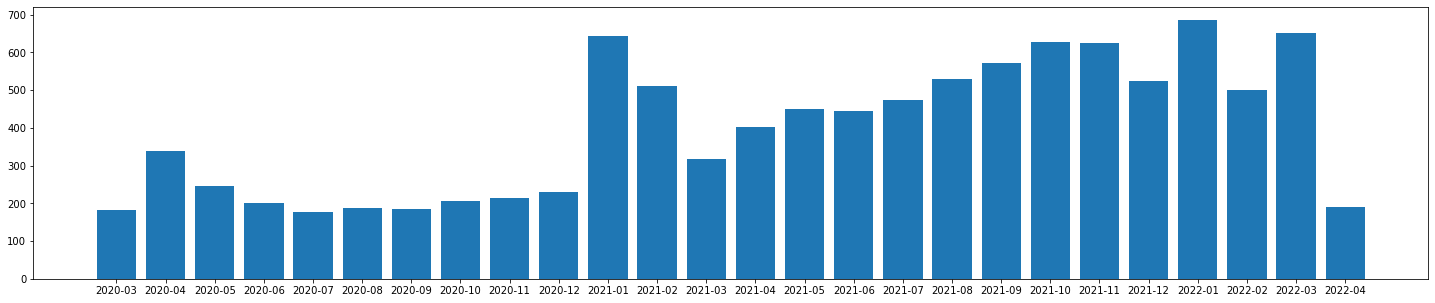

In [24]:
plt.figure(figsize=(25,5))
pl = plt.bar(list(dic.keys()),values_num)

In [25]:
values_positiverate = [list(dic.values())[i]['positive_rate'] for i in range(len(dic.keys()))]

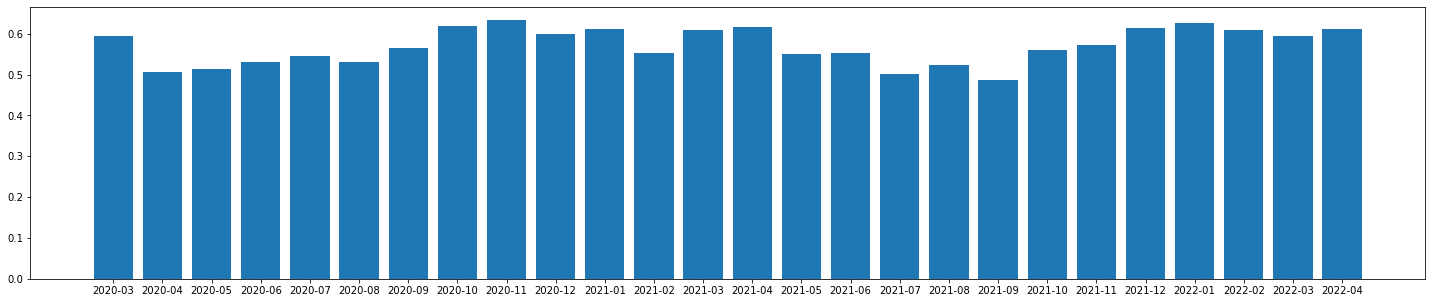

In [26]:
plt.figure(figsize=(25,5))
pl = plt.bar(list(dic.keys()),values_positiverate)

In [27]:
values_negativerate= [list(dic.values())[i]['negative_rate'] for i in range(len(dic.keys()))]

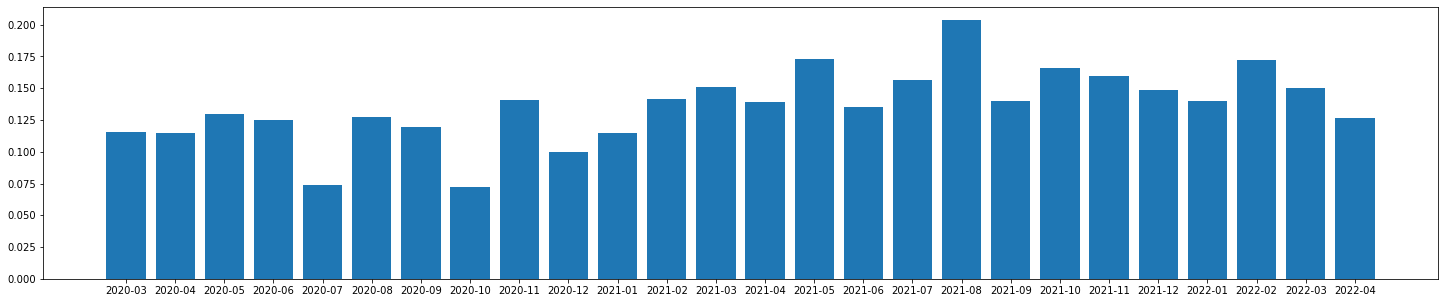

In [28]:
plt.figure(figsize=(25,5))
pl = plt.bar(list(dic.keys()),values_negativerate)

## Topic modeling

In [33]:
# LDA Topic modeling
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
import nltk
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models as gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [29]:
workfromhome1 = []
for k,v in workfromhome.items():
    workfromhome1.append(v['text'])

In [30]:
def lemmatization(texts):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            new_text.append(token.lemma_)
        final = " ".join(new_text)
        final = re.sub('https?:[^\s]+', '', final)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(workfromhome1)

In [31]:
len(lemmatized_texts)

10316

In [34]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

In [37]:
data_words[:10]

[['make', 'it', 'easy', 'for', 'everyone'],
 ['resume',
  'example',
  'try',
  'to',
  'apply',
  'for',
  'at',
  'home',
  'work',
  'amp',
  'need',
  'to',
  'overhaul',
  'my',
  'resume',
  'anyone',
  'have',
  'any',
  'example',
  'that',
  'can',
  'help',
  'out'],
 ['need',
  'legit',
  'work',
  'from',
  'home',
  'sites',
  'anyone',
  'know',
  'of',
  'any',
  'legitimate',
  'work',
  'from',
  'home',
  'site',
  'that',
  'can',
  'browse'],
 ['work', 'from', 'home', 'will', 'improve', 'your', 'mental', 'health'],
 ['have',
  'anyone',
  'face',
  'this',
  'situation',
  'in',
  'team',
  'call',
  'be',
  'in',
  'slack',
  'call',
  'with',
  'my',
  'team',
  'member',
  'and',
  'hear',
  'moaning',
  'from',
  'one',
  'team',
  'member',
  'how',
  'clueless',
  'one',
  'can',
  'be',
  'to',
  'not',
  'use',
  'the',
  'mute',
  'option'],
 ['suggestion',
  'for',
  'nd',
  'wfh',
  'job',
  'have',
  'the',
  'opportunity',
  'to',
  'take',
  'rd',
  's

In [38]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=50)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=50)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[0][0:20])

['make', 'it', 'easy', 'for', 'everyone']


In [39]:
data_bigrams_trigrams

[['make', 'it', 'easy', 'for', 'everyone'],
 ['resume',
  'example',
  'try',
  'to',
  'apply',
  'for',
  'at',
  'home',
  'work',
  'amp',
  'need',
  'to',
  'overhaul',
  'my',
  'resume',
  'anyone',
  'have',
  'any',
  'example',
  'that',
  'can',
  'help',
  'out'],
 ['need',
  'legit',
  'work',
  'from',
  'home',
  'sites',
  'anyone',
  'know',
  'of',
  'any',
  'legitimate',
  'work',
  'from',
  'home',
  'site',
  'that',
  'can',
  'browse'],
 ['work', 'from', 'home', 'will', 'improve', 'your', 'mental_health'],
 ['have',
  'anyone',
  'face',
  'this',
  'situation',
  'in',
  'team',
  'call',
  'be',
  'in',
  'slack',
  'call',
  'with',
  'my',
  'team',
  'member',
  'and',
  'hear',
  'moaning',
  'from',
  'one',
  'team',
  'member',
  'how',
  'clueless',
  'one',
  'can',
  'be',
  'to',
  'not',
  'use',
  'the',
  'mute',
  'option'],
 ['suggestion',
  'for',
  'nd',
  'wfh',
  'job',
  'have',
  'the',
  'opportunity',
  'to',
  'take',
  'rd',
  'shif

In [40]:
stopwords = stopwords.words("english")

In [41]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
word_lst = ['get','just','go','so','do','take','make','give']

In [43]:
new_data_bigrams_trigrams = []
for lst in data_bigrams_trigrams:
    new_lst = []
    for i in lst:
        if i not in word_lst and i not in stopwords:
            new_lst.append(i)
    new_data_bigrams_trigrams.append(new_lst)


In [44]:
data_bigrams_trigrams = new_data_bigrams_trigrams

In [51]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.1
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [56]:
words_missing_in_tfidf

[]

In [57]:
low_value_words

[]

In [60]:
len(corpus)

10316

In [61]:
id2word

In [54]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [58]:
pyLDAvis.enable_notebook()
vis = gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.385491  0.235920       1        1  19.058727
3      0.119192  0.424501       2        1  14.504169
1     -0.325208 -0.241631       3        1  13.795141
8     -0.249716  0.381384       4        1  10.124186
6      0.191267 -0.388209       5        1   8.854781
5     -0.140005  0.147438       6        1   8.706245
7     -0.104121 -0.409899       7        1   8.700391
4     -0.432635  0.019595       8        1   6.573912
2      0.148332 -0.052842       9        1   4.925473
9      0.407402 -0.116257      10        1   4.756975, topic_info=           Term         Freq        Total Category  logprob  loglift
7          home  2675.000000  2675.000000  Default  30.0000  30.0000
12         work  2457.000000  2457.000000  Default  29.0000  29.0000
398       money  1361.000000  1361.000000  Default  28.0000  28.0000
182        time  1754.000000  1754.000000  Default  27.0000  27.0000
70       remote  2425.000000  2425.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1750     method    78.221428    79.324044  Topic10  -4.8824   3.0316
1397  important    78.227556    79.330277  Topic10  -4.8823   3.0316
2209       coin    74.515848    75.618510  Topic10  -4.9309   3.0309
315          ai    70.428488    71.531151  Topic10  -4.9873   3.0300
2499   beginner    70.325468    71.428201  Topic10  -4.9888   3.0300

[337 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1386      8  0.990415   access
78        8  0.996848  account
841       8  0.993548      add
315      10  0.978595       ai
81        6  0.992619     also
...     ...       ...      ...
901       9  0.995403    worth
57        1  0.998703    would
763       9  0.988639    write
204       1  0.998750     year
77        2  0.996611     zoom

[314 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 9, 7, 6, 8, 5, 3, 10])